In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np

### Load and scale the data

In [2]:
feature = pd.read_csv('https://github.com/asarmadi/tandon_summer2021_ml/raw/main/day05/fish_market_feature.csv')
label = pd.read_csv('https://github.com/asarmadi/tandon_summer2021_ml/raw/main/day05/fish_market_label.csv')
X = feature.values
y = label.values

In [3]:
# normalize the data using sklearn's StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xs = scaler.fit_transform(X)



In [4]:
## TODO
# split the SCALED!! data in validation and train

X_train, X_val, y_train, y_val = train_test_split(Xs, y, test_size=0.1, random_state=3)

In [5]:
## TODO
# print the number of data samples in the training and validation data
print(X_train.shape[0])
print(y_train.shape[0])
print(X_val.shape[0])
print(y_val.shape[0])

#print the number of features in the training data
print(X_train.shape[1])

111
111
13
13
5


### Build Model

1) Define a model of three dense hidden layers with ReLU activation functions, plus an final dense layer. The output of the hidden layers should have 32 neurons each. 

2) Train the model for 2000 epochs with a batch size of 64 and a mean squared error loss.


In [6]:
## TODO
n_epochs = 2000
batch_size = 64

model = Sequential([
          Dense(32,activation='relu',input_shape=(5,)),
          Dense(32,activation='relu'),
          Dense(32,activation='relu'),
          Dense(1,activation='linear')
])
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mse','mae']
) # use the Adam optimizer and include MSE and MAE as metrics

# print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,337
Trainable params: 2,337
Non-trainable params: 0
_________________________________________________________________


In [7]:
## TODO
# train the model (use the train data and validation data from above)
history = model.fit(X_train,y_train, validation_data=(X_val,y_val),epochs=n_epochs,batch_size=batch_size)

Epoch 1/2000
2/2 [==============================] - 6s 518ms/step - loss: 273944.4062 - mse: 273944.4062 - mae: 398.5137 - val_loss: 176144.5156 - val_mse: 176144.5156 - val_mae: 317.2643
Epoch 2/2000
2/2 [==============================] - 0s 72ms/step - loss: 273856.9062 - mse: 273856.9062 - mae: 398.4283 - val_loss: 176085.9844 - val_mse: 176085.9844 - val_mae: 317.1927
Epoch 3/2000
2/2 [==============================] - 0s 42ms/step - loss: 273781.5000 - mse: 273781.5000 - mae: 398.3502 - val_loss: 176027.5625 - val_mse: 176027.5625 - val_mae: 317.1216
Epoch 4/2000
2/2 [==============================] - 0s 89ms/step - loss: 273702.5625 - mse: 273702.5625 - mae: 398.2739 - val_loss: 175970.2500 - val_mse: 175970.2500 - val_mae: 317.0507
Epoch 5/2000
2/2 [==============================] - 0s 108ms/step - loss: 273618.7812 - mse: 273618.7812 - mae: 398.1985 - val_loss: 175912.6094 - val_mse: 175912.6094 - val_mae: 316.9805
Epoch 6/2000
2/2 [==============================] - 0s 138ms/st

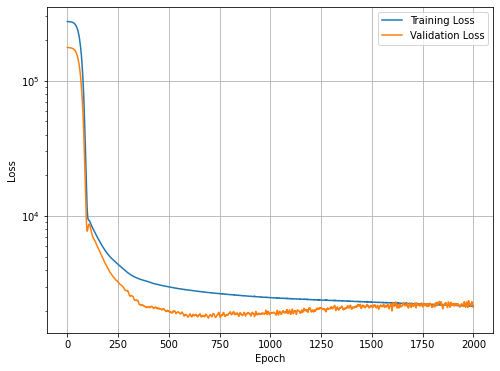

In [8]:
## TODO
# plot the train and validation losses on the same picture
# make sure to label the axis and create a legend 
plt.figure(figsize=(8,6))
plt.semilogy(np.arange(n_epochs),history.history['loss'],label='Training Loss')
plt.semilogy(np.arange(n_epochs),history.history['val_loss'],label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()
plt.legend()

Text(0.5, 1.0, 'Validation')

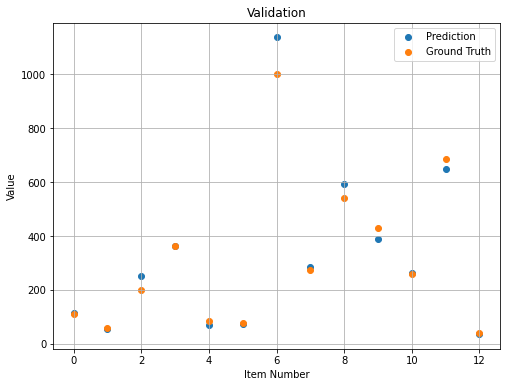

In [9]:
#Plot your predicted y_hat values on the validation data set vs. the true validation labels
y_hat=model.predict(X_val)
plt.figure(figsize=(8,6))
plt.scatter(np.arange(y_hat.shape[0]),y_hat,label='Prediction')
plt.scatter(np.arange(y_val.shape[0]),y_val,label='Ground Truth')
plt.legend()
plt.xlabel('Item Number')
plt.ylabel('Value')
plt.grid()
plt.title("Validation")

#### Load the testing dataset

In [10]:
X_test = pd.read_csv('https://github.com/asarmadi/tandon_summer2021_ml/raw/main/day05/fish_market_test_feature.csv').values
y_test = pd.read_csv('https://github.com/asarmadi/tandon_summer2021_ml/raw/main/day05/fish_market_test_label.csv').values

In [11]:
# scale the test data using the scaler above
Xtest_s = scaler.transform(X_test)

In [12]:
## TODO
# predict the corresponding y_hat value of the test dataset (use the scaled test data)
y_hat = model.predict(Xtest_s)

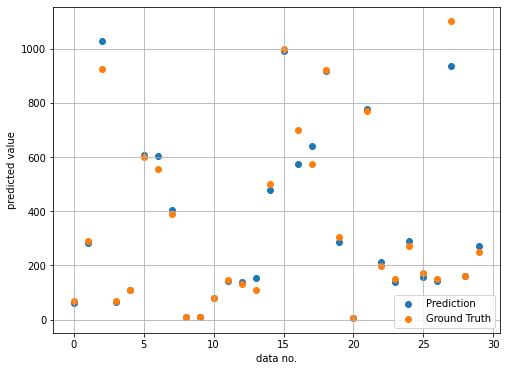

In [13]:
#Plot your predicted y_hat vs. the true y of the test dataset
plt.figure(figsize=(8,6))
plt.scatter(np.arange(y_hat.shape[0]), y_hat, label='Prediction')
plt.scatter(np.arange(y_test.shape[0]), y_test, label='Ground Truth')
plt.legend()
plt.xlabel('data no.')
plt.ylabel('predicted value')
plt.grid()

In [21]:
## TODO
# print MSE, RMSE (root-mse), MAE calculated from predictions on the train and test data
# compare these results against last week's results (when we used linear/polynimial regression)
y_hat_train=model.predict(X_train)
mse_train=np.mean((y_train-y_hat_train)**2)
rmse_train=np.sqrt(mse_train)
mae_train=np.mean(np.abs(y_train-y_hat_train))

y_hat_test=model.predict(Xtest_s)
mse_test=np.mean((y_test-y_hat_test)**2)
rmse_test=np.sqrt(mse_test)
mae_test=np.mean(np.abs(y_test-y_hat_test))

In [22]:
print("Train MSE: ",mse_train)
print("Train RMSE: ",rmse_train)
print("Train MAE: ",mae_train)

print("Test MSE: ",mse_test)
print("Test RMSE: ",rmse_test)
print("Test MAE: ",mae_test)

Train MSE:  2159.303583079849
Train RMSE:  46.46830729733814
Train MAE:  26.17367519086546
Test MSE:  2143.485138976554
Test RMSE:  46.29778762507507
Test MAE:  25.19693082491557


In [23]:
#Print the best MSE and highest performing epoch using built in NumPY and Keras functions 
print("MSE: ",np.min(history.history['mse']))
print("Best Epoch: ",np.where(history.history['mse']==np.min(history.history['mse'])))

MSE:  2155.015625
Best Epoch:  (array([1997]),)
